## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [48]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [50]:
train_images.shape

(60000, 28, 28)

In [53]:
test_labels[1]

2

In [35]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

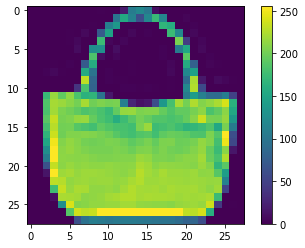

In [20]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [37]:
train_images.shape

(60000, 784)

----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [38]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [39]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [40]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [47]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
network.fit(train_images, train_labels, epochs=20, batch_size=200)

Epoch 1/20
300/300 [==============================] - 6s 20ms/step - loss: 0.2369 - accuracy: 0.9102
Epoch 2/20
300/300 [==============================] - 6s 21ms/step - loss: 0.2257 - accuracy: 0.9148
Epoch 3/20
300/300 [==============================] - 6s 21ms/step - loss: 0.2156 - accuracy: 0.9183
Epoch 4/20
300/300 [==============================] - 6s 21ms/step - loss: 0.2083 - accuracy: 0.9210
Epoch 5/20
300/300 [==============================] - 6s 19ms/step - loss: 0.2020 - accuracy: 0.9241
Epoch 6/20
300/300 [==============================] - 6s 20ms/step - loss: 0.1900 - accuracy: 0.9277
Epoch 7/20
300/300 [==============================] - 6s 20ms/step - loss: 0.1855 - accuracy: 0.9282
Epoch 8/20
300/300 [==============================] - 6s 19ms/step - loss: 0.1748 - accuracy: 0.9323
Epoch 9/20
300/300 [==============================] - 6s 20ms/step - loss: 0.1705 - accuracy: 0.9349
Epoch 10/20
300/300 [==============================] - 6s 20ms/step - loss: 0.1625 - accura

In [43]:
### 第二种写法， Sequential有点像pipeline 一样，写成steps的形式

In [44]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)

2.3.0


In [54]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6669 - accuracy: 0.8035
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6192 - accuracy: 0.8449
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6078 - accuracy: 0.8549
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5993 - accuracy: 0.8631
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5929 - accuracy: 0.8692
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5894 - accuracy: 0.8726
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5853 - accuracy: 0.8760
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5820 - accuracy: 0.8801
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5791 - accuracy: 0.8827
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.578

In [58]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3501 - accuracy: 0.8794

Test accuracy: 0.8794000148773193


In [66]:
test_labels[:2]

array([9, 2], dtype=uint8)

In [65]:
model.predict(test_images[:2])

array([[-12.33772   , -15.207123  , -11.221917  , -19.349342  ,
        -12.366796  ,  -5.427712  , -10.708858  ,  -0.62624156,
         -9.345884  ,   6.473755  ],
       [ -0.28191337, -22.69294   ,   9.349146  ,  -9.885704  ,
          1.8426828 , -22.814768  ,   2.061512  , -38.343197  ,
        -12.8969965 , -19.701488  ]], dtype=float32)